In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/LoanApprovalPrediction.csv")

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df['Loan_Status'].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

In [50]:
df['ApplicantIncome'] = df['ApplicantIncome'] + 50000

In [51]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [53]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

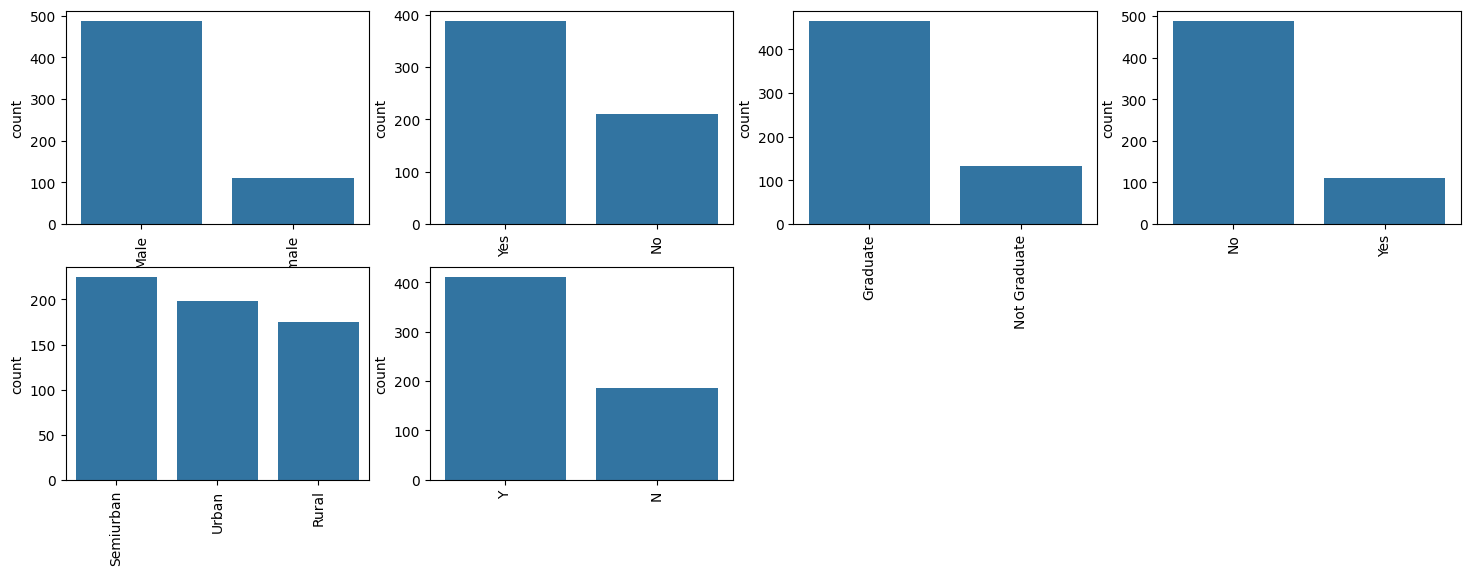

In [54]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [55]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [56]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,55849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,54583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,53000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,52583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,56000,0.0,141.0,360.0,1.0,2,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 56.2 KB


<Axes: >

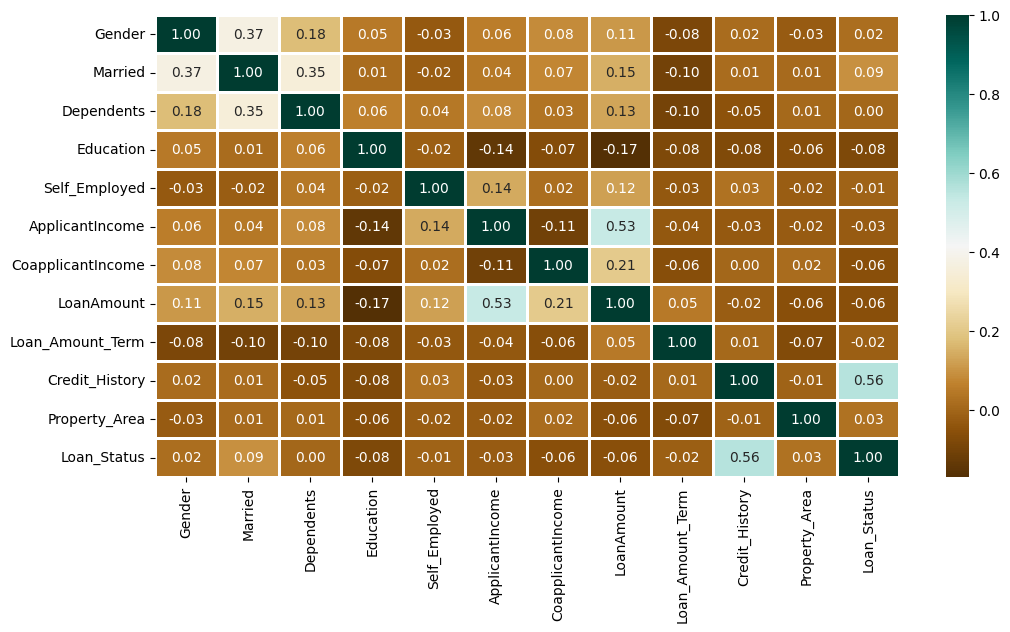

In [58]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

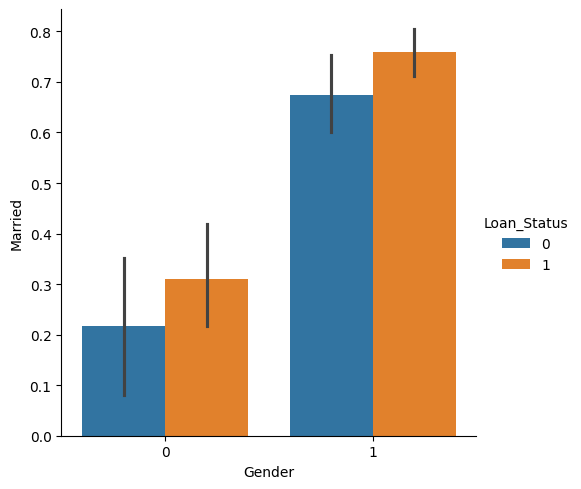

In [59]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=df)

In [60]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean()) 
  
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [61]:
df.shape

(598, 12)

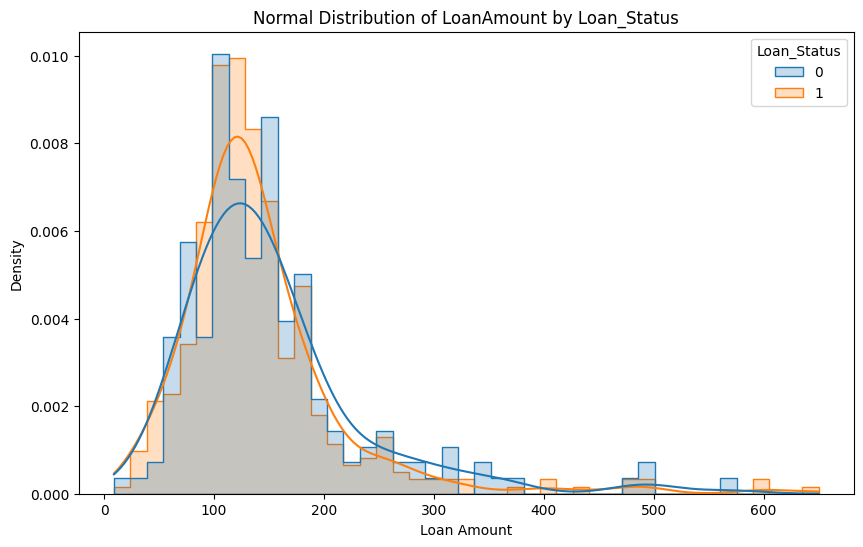

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="LoanAmount", hue="Loan_Status", kde=True, element="step", stat="density", common_norm=False)
plt.title("Normal Distribution of LoanAmount by Loan_Status")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()


In [63]:
df['Loan_Status'].value_counts()


Loan_Status
1    411
0    187
Name: count, dtype: int64

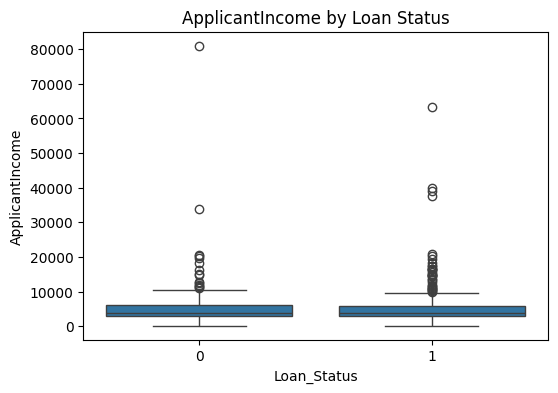

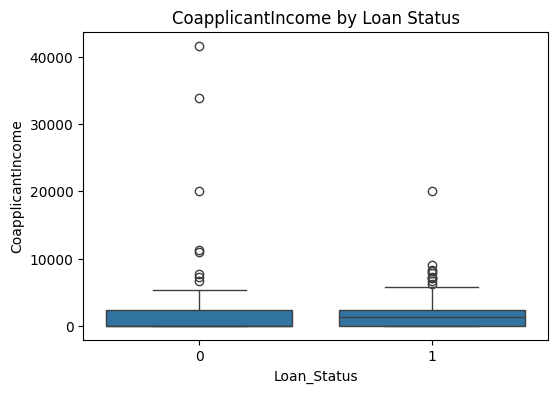

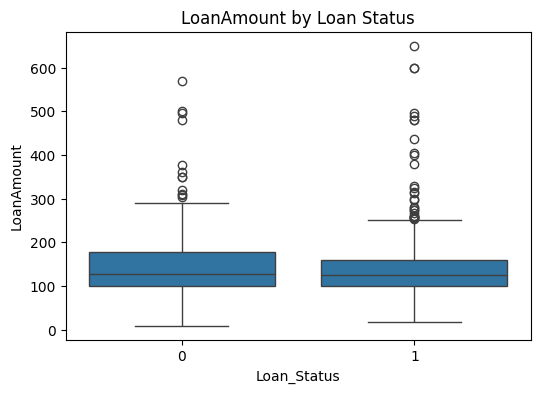

In [64]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Loan_Status', y=col, data=data)
    plt.title(f'{col} by Loan Status')
    plt.show()


In [65]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,55849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,54583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,53000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,52583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,56000,0.0,141.000000,360.0,1.0,2,1


In [66]:
df.to_csv("data/LoanApprovalPrediction_cleaned.csv", index=False)